In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [2]:
mushrooms = pd.read_csv('mushrooms/mushrooms.csv')
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
expl_dict = dict()
with open('mushrooms/explanation.txt', mode='r') as file:
    for line in file:
        col_name, rest = line.split(':')
        word_pairs = rest.split(',')
        inner_dict = dict()
        
        for pair in word_pairs:
            pair = pair.strip()
            pair = pair.split('=')
            inner_dict[pair[1]] = pair[0]
            
        expl_dict[col_name] = inner_dict
        

In [5]:
expl_dict

{'class': {'e': 'edible', 'p': 'poisonous'},
 'cap-shape': {'b': 'bell',
  'c': 'conical',
  'x': 'convex',
  'f': 'flat',
  'k': 'knobbed',
  's': 'sunken'},
 'cap-surface': {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'},
 'cap-color': {'n': 'brown',
  'b': 'buff',
  'c': 'cinnamon',
  'g': 'gray',
  'r': 'green',
  'p': 'pink',
  'u': 'purple',
  'e': 'red',
  'w': 'white',
  'y': 'yellow'},
 'bruises': {'t': 'bruises', 'f': 'no'},
 'odor': {'a': 'almond',
  'l': 'anise',
  'c': 'creosote',
  'y': 'fishy',
  'f': 'foul',
  'm': 'musty',
  'n': 'none',
  'p': 'pungent',
  's': 'spicy'},
 'gill-attachment': {'a': 'attached',
  'd': 'descending',
  'f': 'free',
  'n': 'notched'},
 'gill-spacing': {'c': 'close', 'w': 'crowded', 'd': 'distant'},
 'gill-size': {'b': 'broad', 'n': 'narrow'},
 'gill-color': {'k': 'black',
  'n': 'brown',
  'b': 'buff',
  'h': 'chocolate',
  'g': 'gray',
  'r': 'green',
  'o': 'orange',
  'p': 'pink',
  'u': 'purple',
  'e': 'red',
  'w': 'whit

In [6]:
for column_name in mushrooms.columns:
    for ind in mushrooms.index:
        mushrooms.loc[ind, column_name] = expl_dict[column_name][mushrooms.loc[ind, column_name]]

In [7]:
mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,knobbed,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8120,edible,convex,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8121,edible,flat,smooth,brown,no,none,attached,close,broad,brown,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8122,poisonous,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,...,silky,white,white,partial,white,one,evanescent,white,several,leaves


In [8]:
mushrooms.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [9]:
target = 'class'
col_names = ['cap-shape', 
             'cap-surface', 
             'cap-color', 
             'bruises', 
             'odor',
             'gill-attachment', 
             'gill-spacing', 
             'gill-size', 
             'gill-color',
             'stalk-shape', 
             'stalk-root', 
             'stalk-surface-above-ring',
             'stalk-surface-below-ring', 
             'stalk-color-above-ring',
             'stalk-color-below-ring', 
             'veil-type', 
             'veil-color', 
             'ring-number',
             'ring-type', 
             'spore-print-color', 
             'population', 
             'habitat'
            ]

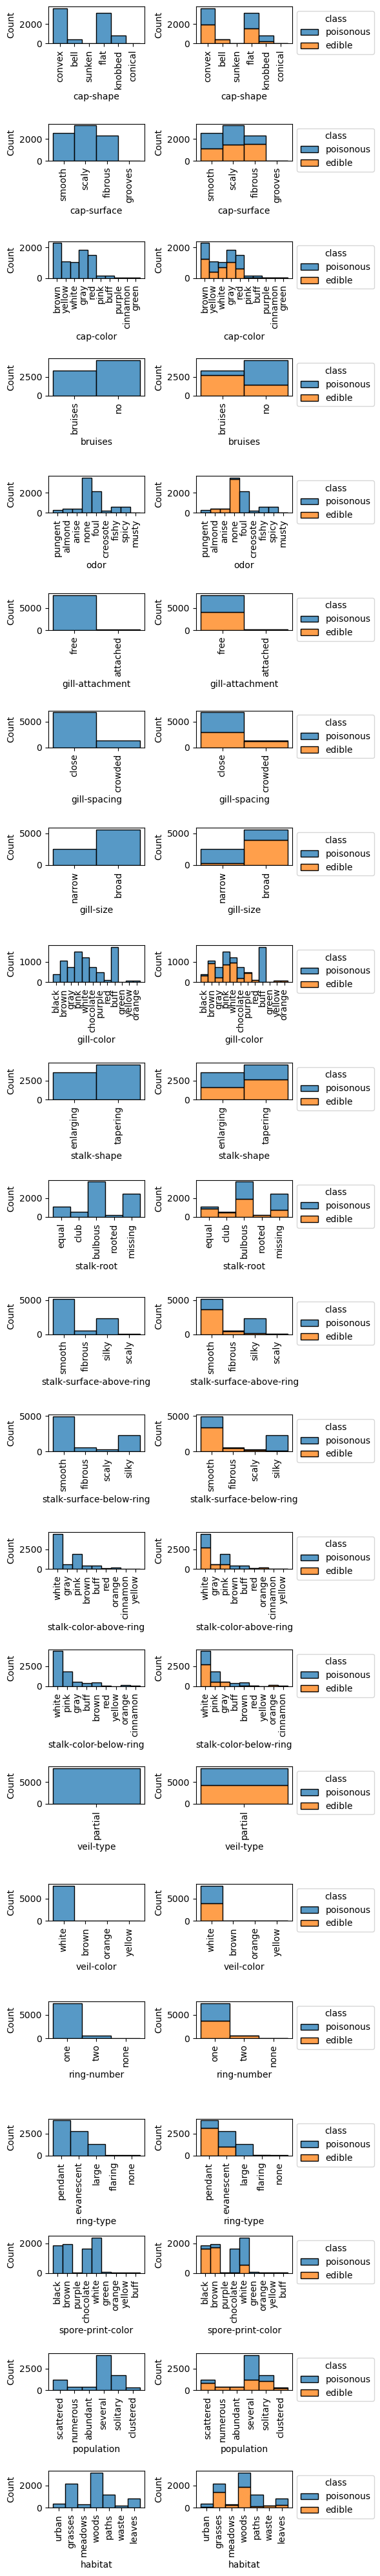

In [10]:
fig, axes = plt.subplots(len(col_names),2)
fig.set_size_inches((6,40))
for pos, col_name in enumerate(col_names):
    sns.histplot(data=mushrooms, x=col_name, ax=axes[pos,0])
    plt.sca(axes[pos,0])
    plt.xticks(rotation=90)
    sns.histplot(data=mushrooms, x=col_name, hue=target, ax=axes[pos,1], multiple='stack')
    sns.move_legend(axes[pos,1], loc='upper left', bbox_to_anchor=(1,1))
    plt.sca(axes[pos,1])
    plt.xticks(rotation=90)
plt.tight_layout()

In [11]:
X = pd.get_dummies(mushrooms[col_names], drop_first=True)
X

,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_grooves,cap-surface_scaly,cap-surface_smooth,cap-color_buff,cap-color_cinnamon,...,population_numerous,population_scattered,population_several,population_solitary,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
8120,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
8121,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
8122,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0


### As there are too many columns, let's visialize only those with high correlation coeficient

In [13]:
corr_mat = X.corr().values
threshold = 0.7
X_min = np.zeros_like(corr_mat) + threshold
X_max = np.ones_like(corr_mat)
mask = (abs(X.corr().values) < X_max) & (abs(X.corr().values) > X_min)
pairs = set()
for pos_x, row in enumerate(mask):
    for pos_y, value in enumerate(row):
        if value and not(pos_y, pos_x) in pairs:
            pair = (pos_x,pos_y)
            pairs.add(pair)

In [14]:
len(pairs)

24

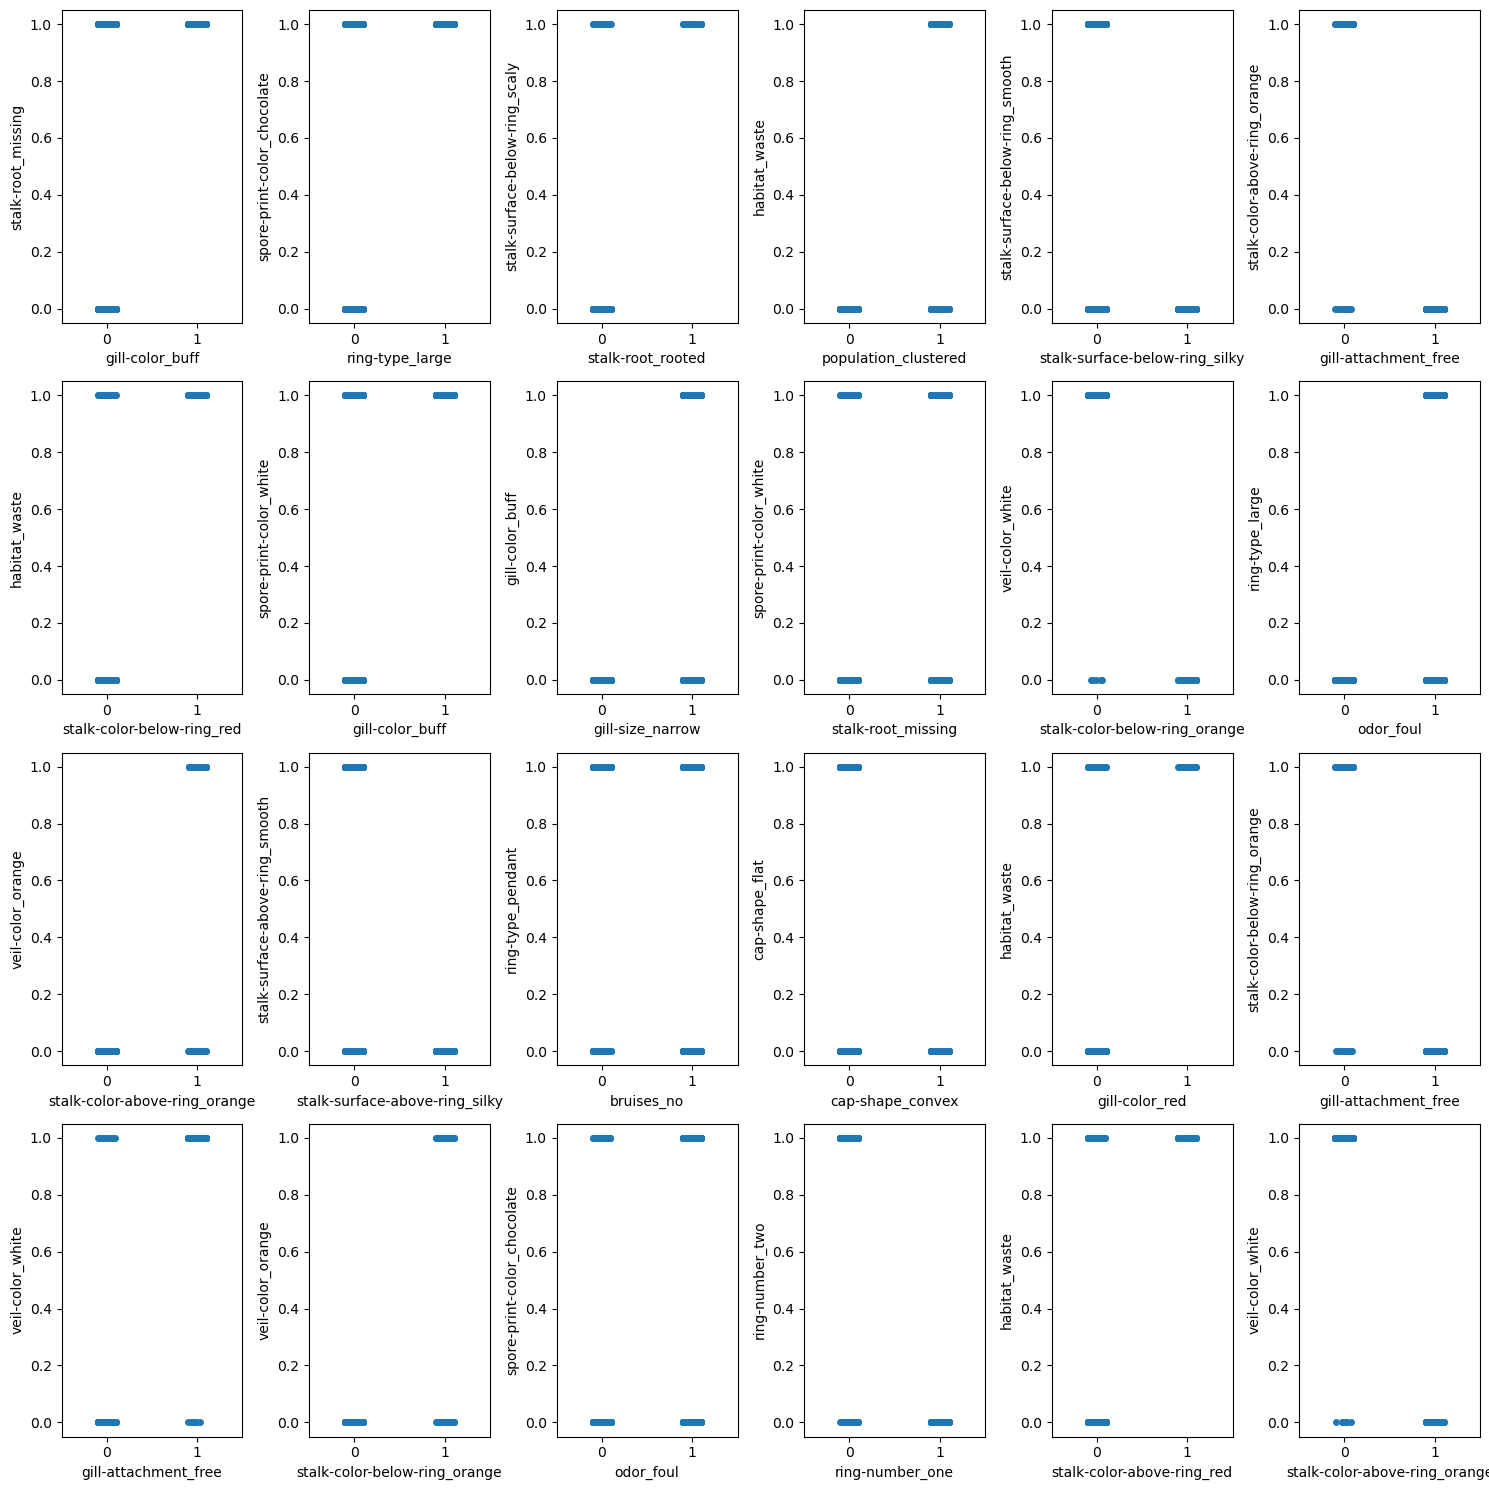

In [15]:
fig, axes = plt.subplots(4,6)
fig.set_size_inches((15,15))
pairs = list(pairs)
for pos, ax in enumerate(axes.ravel()):
    ind_x, ind_y = pairs[pos][0], pairs[pos][1]
    x_name, y_name = X.columns[ind_x], X.columns[ind_y] 
    sns.stripplot(data=X, x=x_name, y=y_name, ax=ax)
plt.tight_layout()

In [16]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
y = encoder.fit_transform(X=mushrooms[[target]])
y

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]])

# Machine Learning Models

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y)

## Decision tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

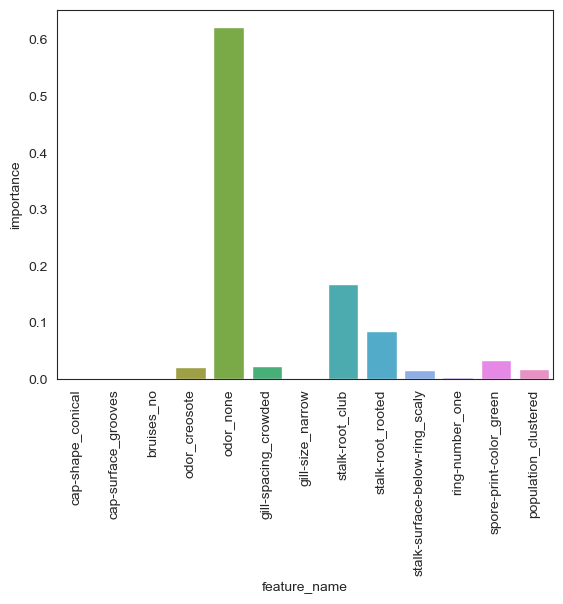

In [24]:
feature_importances = pd.DataFrame(
        {
            'feature_name' : X.columns,
            'importance': dtree.feature_importances_
        }
    )
mask = feature_importances['importance'] > 0
sns.barplot(data=feature_importances[mask],x='feature_name',y='importance')
plt.xticks(rotation=90)
plt.show()

accuracy  1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1067
         1.0       1.00      1.00      1.00       964

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



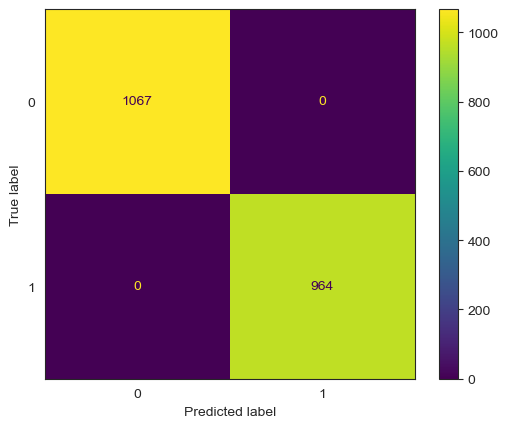

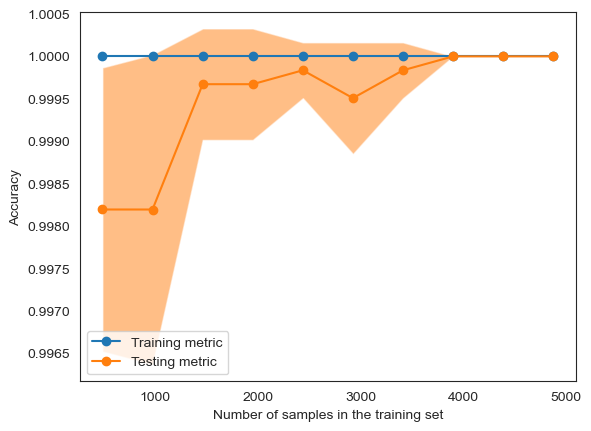

In [30]:
from reports import give_acc_report, get_confusion_matrix, give_learning_curve
give_acc_report(y_test=y_test, y_predict=y_pred)
get_confusion_matrix(y_test, y_pred)
give_learning_curve(model=dtree, X_train=X_train, y_train=y_train)

## Conclusion 
The data itself allows us to achieve accuracy of 1 even using DecisionTree

## Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier()
y_train = y_train.reshape((-1,))
rforest.fit(X_train, y_train)
y_pred = rforest.predict(X_test)

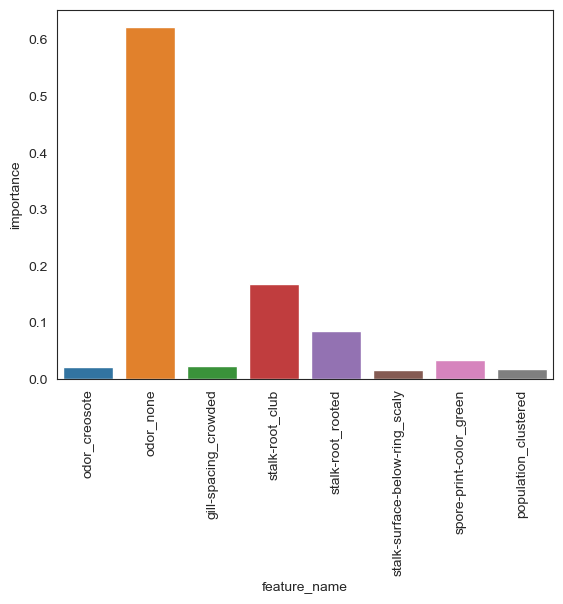

In [41]:
feature_importances = pd.DataFrame(
        {
            'feature_name' : X.columns,
            'importance': dtree.feature_importances_
        }
    )
mask = feature_importances['importance'] > 0.01
sns.barplot(data=feature_importances[mask],x='feature_name',y='importance')
plt.xticks(rotation=90)
plt.show()

accuracy  1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1067
         1.0       1.00      1.00      1.00       964

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



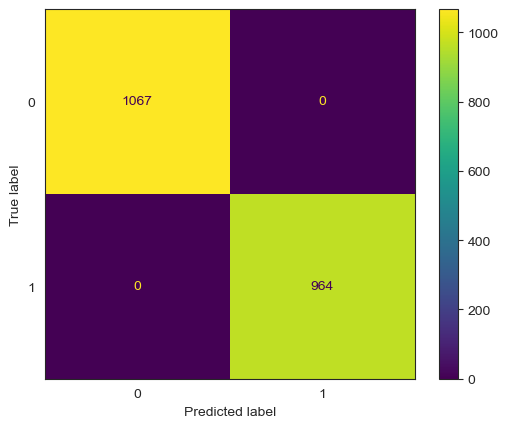

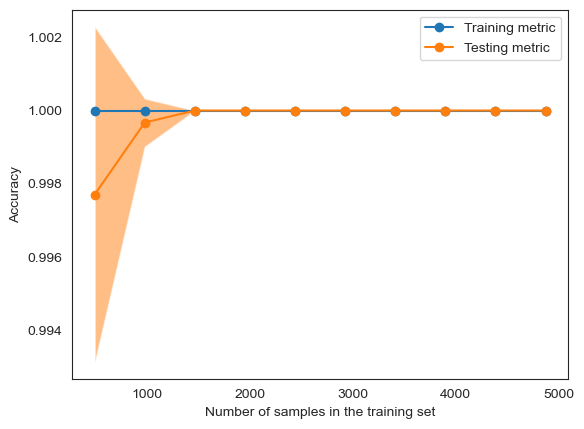

In [42]:
give_acc_report(y_test=y_test, y_predict=y_pred)
get_confusion_matrix(y_test, y_pred)
give_learning_curve(model=rforest, X_train=X_train, y_train=y_train)